<a href="https://colab.research.google.com/github/Snehitha2021/week-2-Bootcamp/blob/main/SUV_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/SUV_Purchase.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.drop('User ID', inplace=True, axis=1)
df.drop('Gender', inplace=True, axis=1)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#importing standard scalar from scikit-learn
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()

#standardzing the xdata apat from the class column NORMALISING..
data_scaled=df.iloc[:,:-1].values

data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [ ]:
data_scaled.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [ ]:
data_scaled.columns=['Age','EstimatedSalary	']

In [ ]:
data_scaled.head()

,Age,EstimatedSalary\t
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [ ]:
data_scaled['Purchased']=df.Purchased

In [ ]:

data_scaled = data_scaled[data_scaled['Purchased'].notna()]

In [ ]:
data_scaled


,Age,EstimatedSalary\t,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [ ]:
#METHOD1
x=data_scaled.iloc[:,:-1].values  #2DARRAY
y=data_scaled.iloc[:,-1:].values

In [ ]:
#splitting the dataset
#spliting he data set into train and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()

X_train = sst.fit_transform(x_train)
X_test = sst.transform(x_test)


In [ ]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


In [ ]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)


Predicted value for training data: 0.821875
Training accuracy: 82.1875


In [ ]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.925
Testing accuracy: 92.5


In [ ]:

accuracy=model.score(x,y)*100
print(accuracy)

84.25


In [ ]:
y_train=y_train.flatten()   #flattens matrix into single D

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'map'
  import sys
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


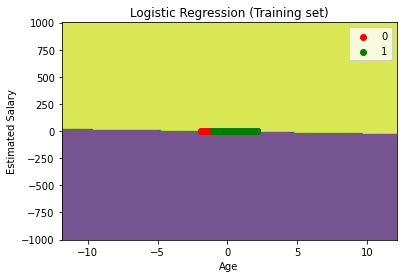

In [ ]:
import matplotlib.pyplot as plt
from matplotlib. colors import ListedColormap
x_set, y_set = sst.inverse_transform(X_train),Y_train
x1,x2 = np.meshgrid(np. arange(start = x_set[:, 0].min( )-10,stop= x_set[:, 0].max() + 10, step = 0.25) ,
np.arange(start = x_set[:, 1].min( )- 1000, stop = x_set[:, 1].max ( ) + 1000, step = 0.25))
plt. contourf(x1,x2,model.predict(sst.transform(np.array([x1.ravel(), x2.ravel()]). T) ).reshape (x1. shape ),
alpha = 0.75, map = ListedColormap(('red','green' )) )
plt. xlim(x1.min( ), x1.max( ))
plt.ylim(x2.min( ), x2. max( ))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],c = ListedColormap(('red','green'))(i),label=j)
plt. title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt. ylabel('Estimated Salary')
plt. legend()
plt.show()